<!--
r""" -->

Численное дифференцирование. Исследование точности конечных разностей

## Введение

Цель лабораторной работы -— исследовать абсолютную погрешность различных методов численного дифференцирования при вычислении первой производной. В работе используются пять формул конечных разностей разного порядка точности.

Шаг численного дифференцирования задаётся выражением:
$$
h_n = \frac{2}{2^n}, \qquad n = 1,\ldots,21.
$$

Проводится исследование для следующих функций:

- $ f_1(x) = \sin(x^2) $
- $ f_2(x) = \cos(\sin x) $
- $ f_3(x) = \exp(\sin(\cos x)) $
- $ f_4(x) = \ln(x+3) $
- $ f_5(x) = (x+3)^{0.5} $

Для каждой функции строится зависимость абсолютной ошибки от шага в логарифмическом масштабе.

## Методы

### Формулы численного дифференцирования


1. Прямая разность (1-й порядок):
    $$
    \frac{f(x+h) - f(x)}{h}
    $$
<br>
2. Обратная разность (1-й порядок):
    $$
    \frac{f(x) - f(x-h)}{h}
    $$
<br>
3. Центральная разность (2-й порядок):
    $$
    \frac{f(x+h) - f(x-h)}{2h}
    $$
<br>
4. Формула 4-го порядка аппроксимации
    $$
    \frac{4}{3}\frac{f(x+h)-f(x-h)}{2h}
    - \frac{1}{3}\frac{f(x+2h)-f(x-2h)}{4h}
    $$
<br>
5. Формула 6-го порядка аппроксимации $$
    \frac{3}{2}\frac{f(x+h)-f(x-h)}{2h}
    - \frac{3}{5}\frac{f(x+2h)-f(x-2h)}{4h}
    + \frac{1}{10}\frac{f(x+3h)-f(x-3h)}{6h}
    $$

### 2.2. Методика исследования

Для каждой функции:

1. Выбирается фиксированная точка $ x_0 = 10 $.
2. Для каждого шага $ h_n $ вычисляется приближённая производная всеми 5 методами.
3. Абсолютная погрешность определяется как
    $$
    \delta(h) = |f'(x_0) - f'(x_0)_{comp}|.
    $$
4. Для всех методов строится график зависимости $ \delta(h) $ от $ h $ в логарифмических координатах.
5. Для каждой функции графики выводятся отдельно.

<!-- """ # -->

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

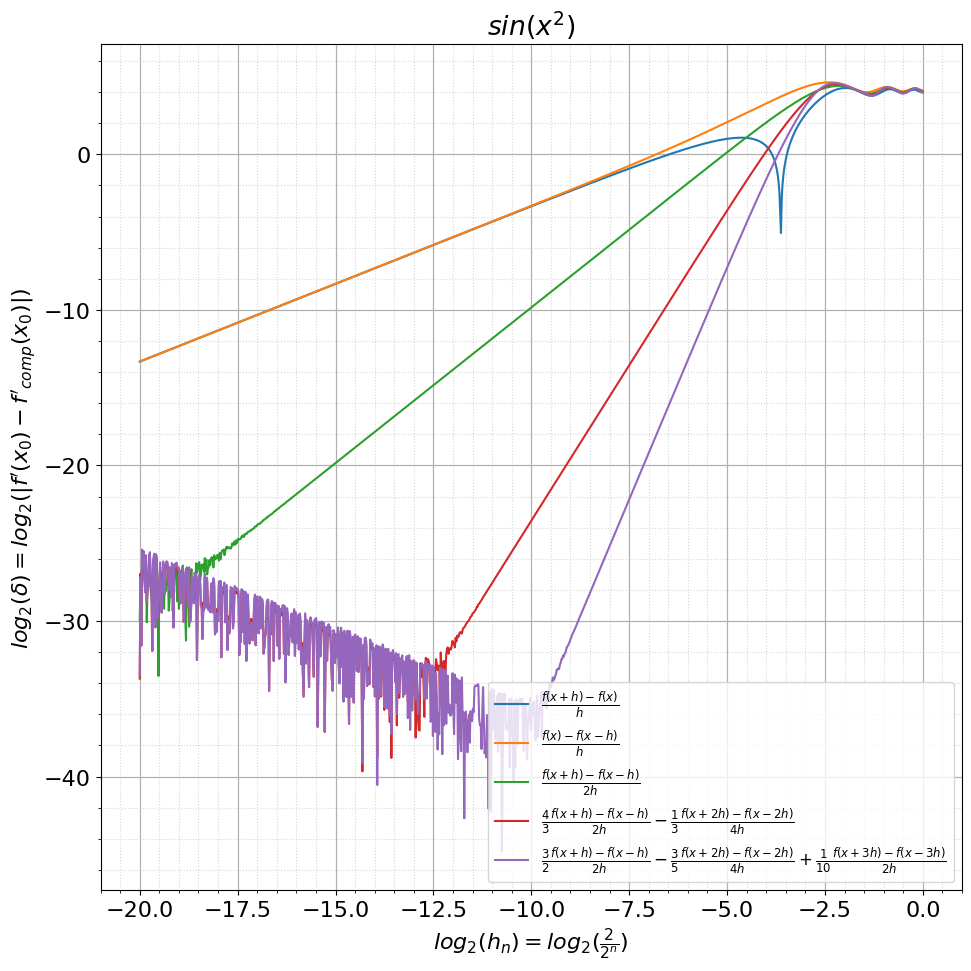

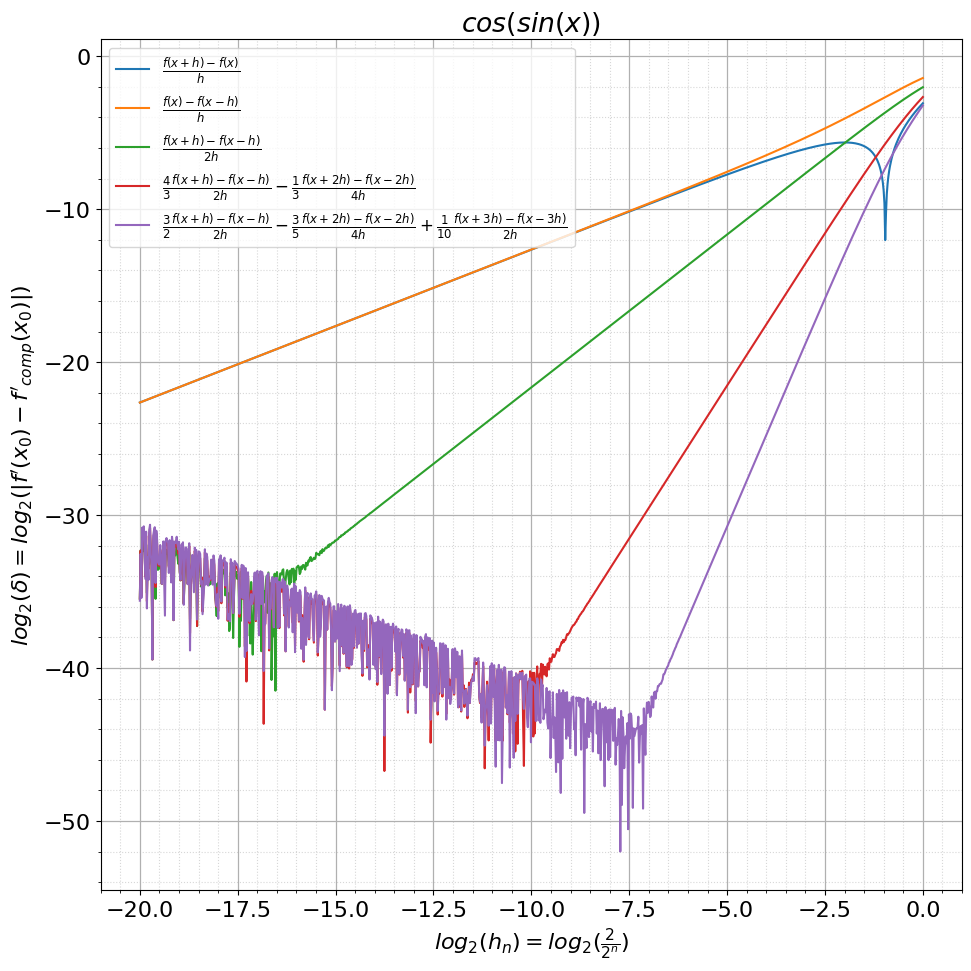

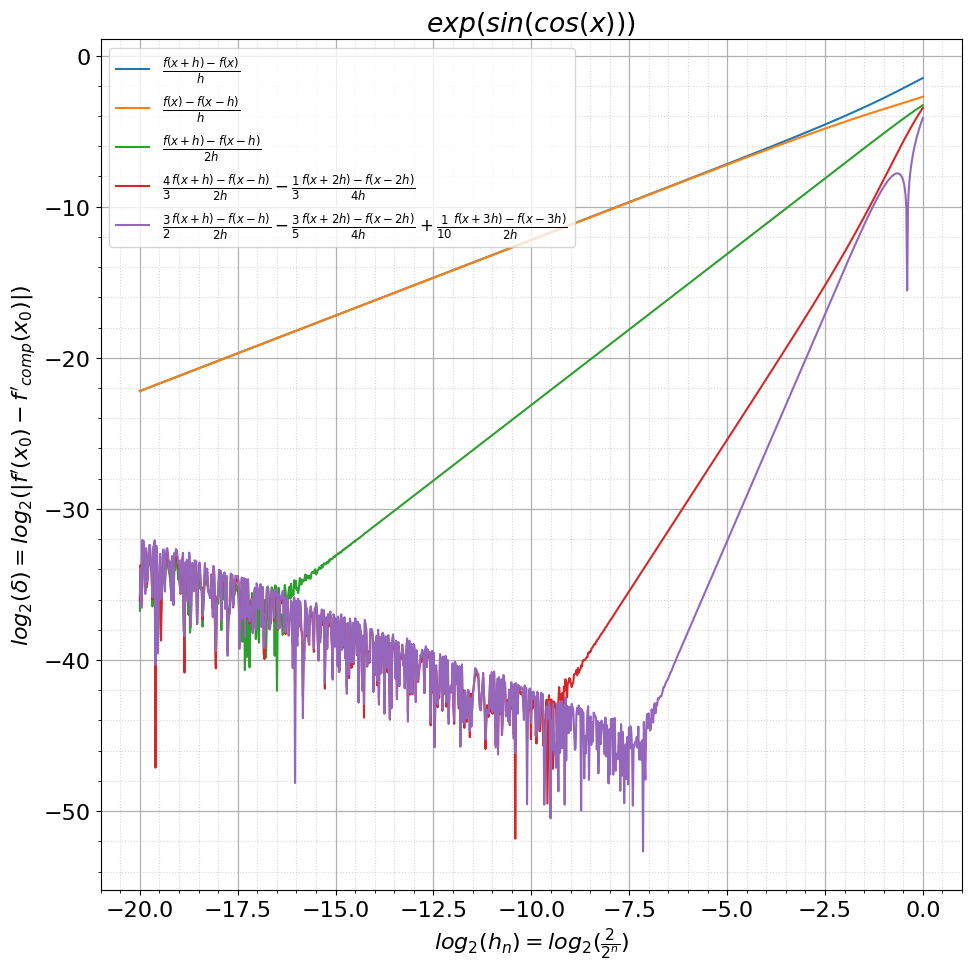

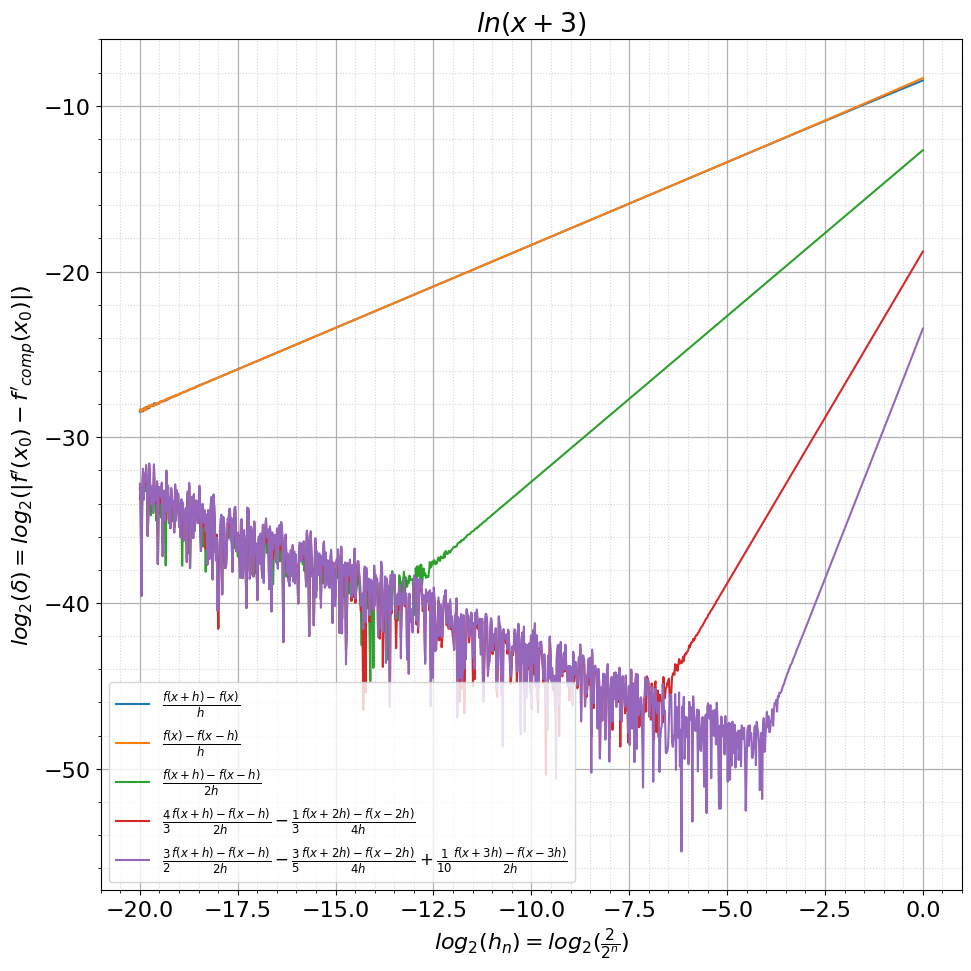

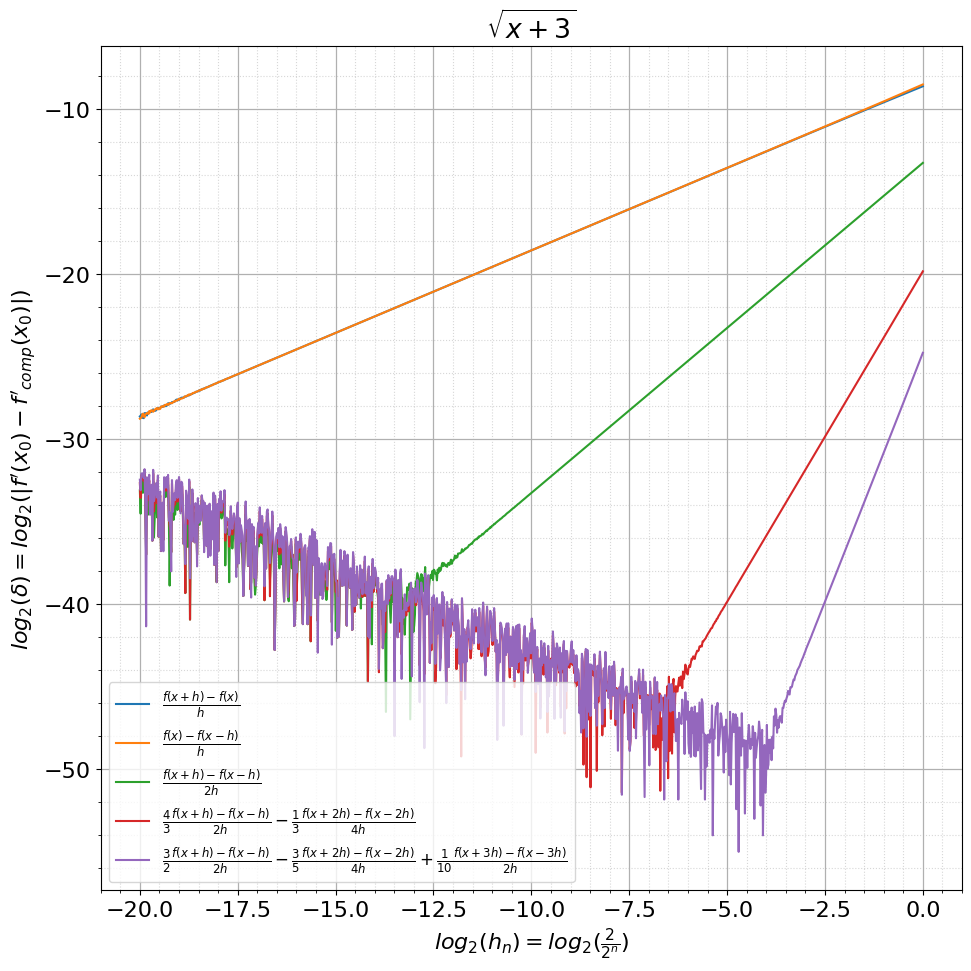

In [16]:
diff_funcs = [lambda f, x, h: (f(x+h)-f(x))/h,
              lambda f, x, h: (f(x)-f(x-h))/h,
              lambda f, x, h: (f(x+h)-f(x-h))/(2*h),
              lambda f, x, h: 4/3*(f(x+h)-f(x-h))/(2*h) - 1/3*(f(x+2*h)-f(x-2*h))/(4*h),
              lambda f, x, h: 3/2*(f(x+h)-f(x-h))/(2*h) - 3/5*(f(x+2*h)-f(x-2*h))/(4*h) + 1/10*(f(x+3*h)-f(x-3*h))/(6*h)]

diff_funcs_str = [r"$\frac{f(x+h) - f(x)}{h}$", r"$\frac{f(x) - f(x-h)}{h}$", r"$\frac{f(x+h) - f(x-h)}{2h}$",
                  r"$\frac{4}{3}\frac{f(x+h) - f(x-h)}{2h} - \frac{1}{3}\frac{f(x+2h) - f(x-2h)}{4h}$",
                  r"$\frac{3}{2}\frac{f(x+h) - f(x-h)}{2h} - \frac{3}{5}\frac{f(x+2h) - f(x-2h)}{4h} + \frac{1}{10}\frac{f(x+3h) - f(x-3h)}{2h}$"]

funcs = [lambda x: np.sin(x**2),
         lambda x: np.cos(np.sin(x)),
         lambda x: np.exp(np.sin(np.cos(x))),
         lambda x: np.log(x + 3),
         lambda x: (x+3)**0.5]

deriv_funcs = [lambda x: np.cos(x**2) * 2 * x,
               lambda x: -np.sin(np.sin(x)) * np.cos(x),
               lambda x: np.exp(np.sin(np.cos(x))) * np.cos(np.cos(x)) * -np.sin(x),
               lambda x: 1/(x + 3),
               lambda x: 1/2*(x+3)**-0.5]


funcs_str = [r"$sin(x^2)$", r"$cos(sin(x))$", r"$exp(sin(cos(x)))$", r"$ln(x + 3)$", r"$\sqrt{x + 3}$"]

x = 2*np.pi

for func, deriv_func, func_str in zip(funcs, deriv_funcs, funcs_str):
    n = np.linspace(-20, 0, 1000)
    h = [2**n_ for n_ in n]

    mpl.rcParams['font.size'] = 16
    plt.figure(figsize = (10,10), facecolor = "white")

    plt.title(func_str)
    plt.ylabel(r"$log_2(\delta) = log_2(|f'(x_0) - f'_{comp}(x_0)|)$")
    plt.xlabel(r"$log_2(h_n) = log_2(\frac{2}{2^n})$")

    for diff_func, diff_func_str in zip(diff_funcs, diff_funcs_str):
        y = [np.log2(np.abs(deriv_func(x) - diff_func(func, x, h_))) for h_ in h]
        plt.plot(n, y, label = diff_func_str)

    plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)
    plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

    plt.minorticks_on()
    plt.tight_layout()
    plt.legend(loc = "best", fontsize = 12)

    plt.show()

<!--
""" -->

### (Результаты)

При выполнении лабораторной работы были построены графики изменения абсолютной погрешности для всех шагов и всех методов.

**Основные наблюдения:**

- Прямая и обратная разности демонстрируют сходимость порядка $ O(h) $.
- Центральная разность показывает ошибку порядка $ O(h^2) $.
- Методы повышенного порядка дают значительно меньшую ошибку на средних значениях шага. Но при малых шагах ошибка перестаёт уменьшаться из-за накопления ошибок округления.

Графики показывают ожидаемое поведение, соответствующее теоретическим порядкам аппроксимации.

<!-- """ # -->